In [23]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df=pd.read_csv('avocado.csv',index_col=0)
df=df.rename(columns=({'Total Volume':'total_volume' ,
                  'Date':'date',
                  'AveragePrice':'average_price',
                  'Total Bags'  :'total_bags',
                  'Small Bags'  :'small_bags',
                  'Large Bags'  :'large_bags',
                  'XLarge Bags' :'xlarge_bags'
                  }))
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [25]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
4046                    float64
4225                    float64
4770                    float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
region                   object
dtype: object

#### Для авокадо типа organic в Чикаго посчитайте скользящее среднее с окном =4 и экспоненциальное скользящее среднее с параметром span=4. 

In [34]:
avocado_organic=df.query('type=="organic" and region=="Chicago"')
avocado_organic

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.58,20995.37,1064.71,19320.66,0.0,610.00,610.00,0.00,0.0,organic,2015,Chicago
1,2015-12-20,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago
2,2015-12-13,1.59,24059.71,876.48,23109.90,0.0,73.33,73.33,0.00,0.0,organic,2015,Chicago
3,2015-12-06,1.59,27081.13,819.66,26104.80,0.0,156.67,156.67,0.00,0.0,organic,2015,Chicago
4,2015-11-29,1.59,22168.32,457.29,21677.70,0.0,33.33,33.33,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.62,46956.84,313.29,32668.25,0.0,13975.30,13975.30,0.00,0.0,organic,2018,Chicago
8,2018-01-28,1.72,40770.94,215.40,31318.93,0.0,9236.61,9236.61,0.00,0.0,organic,2018,Chicago
9,2018-01-21,1.82,36688.67,83.93,28134.16,0.0,8470.58,8470.58,0.00,0.0,organic,2018,Chicago
10,2018-01-14,1.79,44955.89,133.39,31177.44,0.0,13645.06,13635.06,10.00,0.0,organic,2018,Chicago


In [35]:
avocado_organic['rolling']=avocado_organic.average_price.rolling(4).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_20436\754417541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_organic['rolling']=avocado_organic.average_price.rolling(4).mean()


In [36]:
avocado_organic['ewm']=avocado_organic.average_price.ewm(span=4).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_20436\2432565169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_organic['ewm']=avocado_organic.average_price.ewm(span=4).mean()


In [16]:
avocado_organic.isna().sum()
#Пропущенных значений нет

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
region           0
dtype: int64

In [18]:
avocado_organic['average_price '] = avocado_organic['average_price'].round(3)
avocado_organic.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,average_price
0,2015-12-27,1.58,20995.37,1064.71,19320.66,0.0,610.00,610.00,0.00,0.0,organic,2015,Chicago,1.58
1,2015-12-20,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago,1.58
2,2015-12-13,1.59,24059.71,876.48,23109.90,0.0,73.33,73.33,0.00,0.0,organic,2015,Chicago,1.59
3,2015-12-06,1.59,27081.13,819.66,26104.80,0.0,156.67,156.67,0.00,0.0,organic,2015,Chicago,1.59
4,2015-11-29,1.59,22168.32,457.29,21677.70,0.0,33.33,33.33,0.00,0.0,organic,2015,Chicago,1.59


#### Посчитайте среднее скользящее цены авокадо с окном равным 3. Чему равно максимальное значение?Ответ округлите до 2 знаков после точки

In [3]:
avocado_mean=df[['date','average_price']]
avocado_mean_df= avocado_mean.groupby('date',as_index=False)\
.agg({'average_price':'mean'})\
.sort_values('date')

In [30]:
round(avocado_mean.average_price.rolling(3).mean().max(),2)


3.12

#### Постройте графики скользящего среднего с разными значениями  окна (2,4,10,50)

C:\Users\user\AppData\Local\Temp\ipykernel_20436\2343761723.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df=avocado_mean_df.rolling(i).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_20436\2343761723.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df=avocado_mean_df.rolling(i).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_20436\2343761723.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df=avocado_

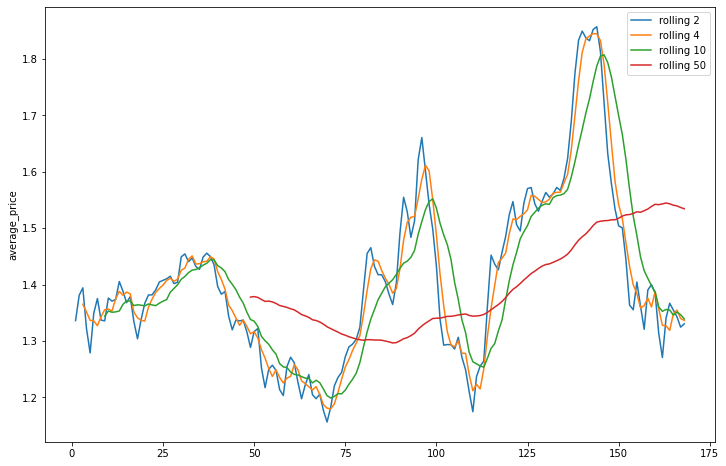

In [12]:
plt.figure(figsize=(12,8))
windows = [2, 4, 10, 50]
for i in windows:
    df=avocado_mean_df.rolling(i).mean()
    sns.lineplot(x=df.index,y=df.average_price,label=f'rolling {i}')

#### Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() c параметром span=2 , чтобы получить экспоненциальное скользящее среднее . Запишите результат в avocado_ewm

In [4]:
avocado_ewm = avocado_mean_df['average_price'].ewm(span=2).mean().round(2)
avocado_ewm

0      1.30
1      1.35
2      1.38
3      1.39
4      1.29
       ... 
164    1.36
165    1.35
166    1.34
167    1.32
168    1.34
Name: average_price, Length: 169, dtype: float64